In [9]:
# Imports from the Python standard library
from io import StringIO
from typing import Iterable

# Imports from the comp chem ecosystem
import mdtraj
import nglview
import numpy as np
import openmm
from openff.units import Quantity, unit
from openmm import unit as openmm_unit
#from pdbfixer import PDBFixer

# New topology imports
from openff.interchange import Interchange
from openff.interchange.components._packmol import UNIT_CUBE, pack_box
import rdkit

# Imports from the toolkit
from openff.toolkit import ForceField, Molecule, Topology

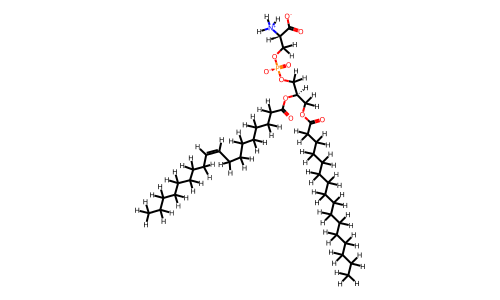

In [10]:
# Load a molecule from a SDF file
POPS = Molecule.from_file("POPS.sdf")
# , allow_undefined_stereo = True
POPS.visualize()

In [11]:
topology = Topology.from_molecules(
    [POPS]
)
topology

In [12]:
forcefield = ForceField("openff-2.1.0.offxml")
forcefield

In [13]:
from openff.interchange import Interchange

interchange = Interchange.from_smirnoff(
    force_field=forcefield,
    topology=topology,
)
interchange

/Users/patrickfrankel/anaconda3/envs/openff/lib/python3.11/site-packages/openff/interchange/smirnoff/_create.py:237: UserWarning: Automatically down-converting BondHandler from version 0.4 to 0.3. In the future, this down-conversion will not happen and verison 0.3 will not be supported.
  _downconvert_vdw_handler(force_field["vdW"])


Interchange with 7 collections, non-periodic topology with 127 atoms.

In [14]:
# Export GROMACS files.
interchange.to_top("POPS2.top")
interchange.to_gro("POPS.gro")